**Note:** In this PartC of the assignment, certain sections such as data loading and data exploration are same to those in PartA/B and are required to be performed for this multivariate linear regression with any algorithm or with feature engineering.

### • Business Understanding

•	**Introduction:** This project involves working with a consolidated dataset compiled from census data in the USA to build a regression model. Through data exploration, cleaning, and using multiple features with feature engineering or utilizing any algorithm the objective is to create a model that accurately predicts the mortality rate on unseen data. The resulting model can be used to gain insights into the relationships between different variables and inform decision-making processes.

•	**Dataset:** Regression analysis on US census data (comparising various 33 freatures informaiton about US counties), following are the datasets.

        Training set: cancer_us_county-training.csv
        Testing set: cancer_us_county-testing

•	**Business Problem:** Build a model for Multivariate Linear Regression with feature engineering/using any algorithm, which can accurately predict cancer mortality rates. The model should use multiple data features associated with U.S. counties. Emphasis should be placed on the effectiveness of using multiple features with feature engineering or employing any algorithms to achieve this goal.

The following tasks are performed for this Multiple Linear Regression.

• Business Understanding

• Data Understanding

        1] Loading  Data
        2] Exploring Data
        3] Analysing Relationship between Target and Independent Feature

• Data Preparation

        4] Selecting Target and Independent Feature
        5] Splitting Data into Training, Validation and Testing Sets

• Modeling

        6] Assessing Baseline Performance
        7] Training Univariate Linear Regression Model

• Model Evaluation

        8] Analysing Model Performance
    
• Summary and Deployment Suggestion

In [1]:
# Importing required Python libraries
import numpy as np
import pandas as pd

# Importing SKLearn libaries and Lasso Regression ML Model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
 

# Importing required Data Visualization libraries
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# Importing other formatting libraries
from quo import echo
import warnings

In [2]:
#Ignoring warnings to maintain a clean coding.
warnings.filterwarnings("ignore")

### • Data Understanding

#### 1] Loading  Data

In [3]:
# Creating variable named file_url to hold the path for csv data files. Note: Change this path to the appropriate path of file location for successful loading of data.
file_url = '/Users/monalipatil/Monali/MDSI-Semester1/Machine Learning Algorithms and Applications/Assignment1/'

# Loading training and testing data into pandas separate dataframes namely 'df_train' and 'df_test'. 
df_train = pd.read_csv(file_url + 'cancer_us_county-training.csv')
df_test = pd.read_csv( file_url + 'cancer_us_county-testing.csv')

#### 2] Exploring Data

• Checking some datapoints of the datasets. 

In [4]:
# Displaying first 5 rows of the training dataset. 
df_train.head(5)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
0,88.000000,40,261.0,561.400000,29090,13352,26.8,2771.120431,"[22640, 34218.1]",39.8,...,32.0,47.5,32.9,99.693045,0.044920,0.000000,0.000000,55.499459,6.838710,0
1,73.000000,35,167.3,345.600000,29782,21903,38.8,0.000000,"[22640, 34218.1]",32.3,...,18.8,45.3,34.1,94.791383,1.649850,0.063631,2.854286,52.818296,4.799131,1
2,292.000000,124,191.0,468.400000,41955,48985,15.5,0.000000,"(40362.7, 42724.4]",42.2,...,44.9,34.5,16.0,95.102348,1.741749,0.376429,0.445611,50.560800,3.996826,2
3,1962.667684,7,165.4,453.549422,55378,3007,11.1,0.000000,"(54545.6, 61494.5]",41.6,...,49.6,30.1,15.2,85.833870,0.933677,0.160979,7.244044,52.565181,3.291536,3
4,43.000000,20,160.6,349.700000,26309,8551,35.3,0.000000,"[22640, 34218.1]",43.9,...,30.4,45.1,24.5,24.535525,73.223736,0.394100,1.396239,33.641208,3.166561,4


In [5]:
# Displaying first 5 rows of the testing dataset. 
df_test.head(5)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
0,449.0,154,159.5,479.8,51880,104926,18.7,57.183158,"(51046.4, 54545.6]",30.2,...,51.0,24.9,13.1,81.260411,4.154831,10.045737,0.876222,41.071243,4.367123,2553
1,340.0,140,167.2,438.5,55472,55423,12.4,0.000000,"(54545.6, 61494.5]",46.9,...,37.6,36.3,16.0,93.660078,0.818115,0.626281,3.116360,57.529142,6.844366,904
2,54.0,18,131.6,410.8,49380,10103,11.7,0.000000,"(48021.6, 51046.4]",49.4,...,32.6,40.3,19.4,98.292181,0.041152,0.164609,0.051440,55.928482,1.604585,2192
3,94.0,46,189.4,403.8,45979,16708,13.5,598.515681,"(45201, 48021.6]",43.9,...,45.1,33.1,13.3,96.090377,1.555569,0.715680,0.378541,48.409405,8.255410,1326
4,2718.0,1065,168.9,432.1,51527,726106,20.7,60.597213,"(51046.4, 54545.6]",33.5,...,41.7,37.7,25.8,57.002148,7.093743,14.785464,11.692122,51.852122,6.148433,2394


•	Checking dimension of the datasets.

In [6]:
# Describing the number of rows and columns/shape from both datasets.
print(df_train.shape)
print("\nThus, the training dataset consist of:")
print("Rows: {}".format(df_train.shape[0]))
print("Columns: {}".format(df_train.shape[1]))

print("\n\n", df_test.shape)
print("\nThus, the testing dataset consist of:")
print("Rows: {}".format(df_test.shape[0]))
print("Columns: {}".format(df_test.shape[1]))

(2438, 35)

Thus, the training dataset consist of:
Rows: 2438
Columns: 35


 (609, 35)

Thus, the testing dataset consist of:
Rows: 609
Columns: 35


•	Identifying attributes names. 

In [7]:
# Checking attributes of the dataset.
df_train.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate', 'Id'],
      dtype='object')

•	Describing summary information of the dataset.

In [8]:
# Checking attributes summary information(features datatypes) of the dataset.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2438 non-null   float64
 1   avgDeathsPerYear         2438 non-null   int64  
 2   TARGET_deathRate         2438 non-null   float64
 3   incidenceRate            2438 non-null   float64
 4   medIncome                2438 non-null   int64  
 5   popEst2015               2438 non-null   int64  
 6   povertyPercent           2438 non-null   float64
 7   studyPerCap              2438 non-null   float64
 8   binnedInc                2438 non-null   object 
 9   MedianAge                2438 non-null   float64
 10  MedianAgeMale            2438 non-null   float64
 11  MedianAgeFemale          2438 non-null   float64
 12  Geography                2438 non-null   object 
 13  AvgHouseholdSize         2438 non-null   float64
 14  PercentMarried          

#### Observation: 
* In the dataset, most attributes are of an integer(int64), decimal(float) data type and two are of string/character(object) data type.

•	Checking summary statistics of the dataset.

In [9]:
# Describing the summary statistics the dataset Note: Only integer datatype's variables summary is described by default.
df_train.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
count,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2.438000e+03,2438.000000,2438.000000,2438.000000,2438.000000,...,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000
mean,587.171930,180.592699,178.848482,448.308247,47028.427810,9.851579e+04,16.854348,166.019192,45.313782,39.640853,...,41.242453,36.275718,19.234824,83.776008,9.043586,1.230949,1.947961,51.216669,5.627447,1523.789171
std,1236.447895,438.473144,27.538452,53.247868,11919.386622,2.745272e+05,6.388398,563.813830,45.053173,5.217646,...,9.366433,7.823347,6.094083,16.275962,14.361902,2.558111,3.541698,6.501254,1.966257,874.905673
min,6.000000,3.000000,66.300000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,0.000000
25%,76.000000,28.000000,161.400000,420.300000,38872.750000,1.154575e+04,12.100000,0.000000,37.800000,36.400000,...,34.600000,30.925000,15.000000,77.341176,0.634412,0.247022,0.288937,47.826087,4.516355,775.250000
50%,172.500000,62.000000,178.100000,453.549422,45186.500000,2.694250e+04,15.900000,0.000000,41.000000,39.600000,...,41.300000,36.400000,18.800000,90.121405,2.302054,0.550713,0.798971,51.662077,5.366485,1512.500000
75%,521.500000,151.000000,195.300000,481.975000,52492.500000,6.952450e+04,20.400000,92.562203,44.075000,42.500000,...,47.600000,41.500000,23.100000,95.464864,10.452697,1.207158,2.106155,55.331622,6.458322,2279.750000
max,24965.000000,9445.000000,293.900000,1014.200000,125635.000000,5.238216e+06,47.400000,9762.308998,624.000000,64.700000,...,70.700000,65.100000,46.600000,100.000000,84.866024,42.619425,41.930251,78.075397,18.556701,3046.000000


In [10]:
# Describing summary statistics for all datatype variables of the dataset.
df_train.describe(include='all')

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
count,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2.438000e+03,2438.000000,2438.000000,2438,2438.000000,...,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(40362.7, 42724.4]",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,587.171930,180.592699,178.848482,448.308247,47028.427810,9.851579e+04,16.854348,166.019192,NaN,45.313782,...,41.242453,36.275718,19.234824,83.776008,9.043586,1.230949,1.947961,51.216669,5.627447,1523.789171
std,1236.447895,438.473144,27.538452,53.247868,11919.386622,2.745272e+05,6.388398,563.813830,NaN,45.053173,...,9.366433,7.823347,6.094083,16.275962,14.361902,2.558111,3.541698,6.501254,1.966257,874.905673
min,6.000000,3.000000,66.300000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,NaN,22.300000,...,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,0.000000
25%,76.000000,28.000000,161.400000,420.300000,38872.750000,1.154575e+04,12.100000,0.000000,NaN,37.800000,...,34.600000,30.925000,15.000000,77.341176,0.634412,0.247022,0.288937,47.826087,4.516355,775.250000
50%,172.500000,62.000000,178.100000,453.549422,45186.500000,2.694250e+04,15.900000,0.000000,NaN,41.000000,...,41.300000,36.400000,18.800000,90.121405,2.302054,0.550713,0.798971,51.662077,5.366485,1512.500000
75%,521.500000,151.000000,195.300000,481.975000,52492.500000,6.952450e+04,20.400000,92.562203,NaN,44.075000,...,47.600000,41.500000,23.100000,95.464864,10.452697,1.207158,2.106155,55.331622,6.458322,2279.750000


• Inspecting if any null values in the datasets.

In [11]:
# Checking if any null values in the training datasets.
df_train.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            1826
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          122
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     500
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

#### Observation: 

* There are three numerical features in the training dataset with significant amount of missing values comprising 'PctSomeCol18_24', 'PctEmployed16_Over' and 'PctPrivateCoverageAlone'. Since machine learning linear algorithms cannot handle missing value in continuous/any attributes, we must either handle these missing values or remove the columns altogether.

* The 'PctSomeCol18_24' feature denotes the percentage of individuals aged between 18 and 24 years who have attained some college education. However, since more than 70% of the records have missing values in this column (only 612 recorded out of 2438), it is impractical to fill them with mean values. Therefore, removing this feature from both the dataset.

* For the rest two columns 'PctEmployed16_Over' and 'PctPrivateCoverageAlone', substituting null values with its mean value. 

In [12]:
# Dropping 'PctSomeCol18_24' column from both datasets as it has higher number of nulls values. 
df_train.drop(['PctSomeCol18_24'], axis=1, inplace=True) 
df_test.drop(['PctSomeCol18_24'], axis=1, inplace=True)

# Filling null values from 'PctEmployed16_Over' and 'PctPrivateCoverageAlone' columns with its mean value of the training dataset.
df_train['PctEmployed16_Over'].fillna(df_train['PctEmployed16_Over'].mean(), inplace=True)
df_train['PctPrivateCoverageAlone'].fillna(df_train['PctPrivateCoverageAlone'].mean(), inplace=True)

In [13]:
# Checking if any null values in the testing datasets.
df_test.isnull().sum()

avgAnnCount                  0
avgDeathsPerYear             0
TARGET_deathRate             0
incidenceRate                0
medIncome                    0
popEst2015                   0
povertyPercent               0
studyPerCap                  0
binnedInc                    0
MedianAge                    0
MedianAgeMale                0
MedianAgeFemale              0
Geography                    0
AvgHouseholdSize             0
PercentMarried               0
PctNoHS18_24                 0
PctHS18_24                   0
PctBachDeg18_24              0
PctHS25_Over                 0
PctBachDeg25_Over            0
PctEmployed16_Over          30
PctUnemployed16_Over         0
PctPrivateCoverage           0
PctPrivateCoverageAlone    109
PctEmpPrivCoverage           0
PctPublicCoverage            0
PctPublicCoverageAlone       0
PctWhite                     0
PctBlack                     0
PctAsian                     0
PctOtherRace                 0
PctMarriedHouseholds         0
BirthRat

#### Observation: 

* Similarly, the testing dataset has two attributes namely 'PctEmployed16_Over' and 'PctPrivateCoverageAlone' with notable amounts of missing values, and they must be treated appropriately as will be tesitng model with all features. 

* Therefore, altering these columns' null values with their mean.

In [14]:
# Replacing null values from 'PctEmployed16_Over' and 'PctPrivateCoverageAlone' columns of the testing dataset with its mean value.
df_test['PctEmployed16_Over'].fillna(df_test['PctEmployed16_Over'].mean(),inplace=True)
df_test['PctPrivateCoverageAlone'].fillna(df_test['PctPrivateCoverageAlone'].mean(),inplace=True)

• Checking if any missing values in the datasets.

In [15]:
# Checking if any missing values in the trainng dataset.
df_train.isna().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
Id                         0
dtype: int64

<Axes: >

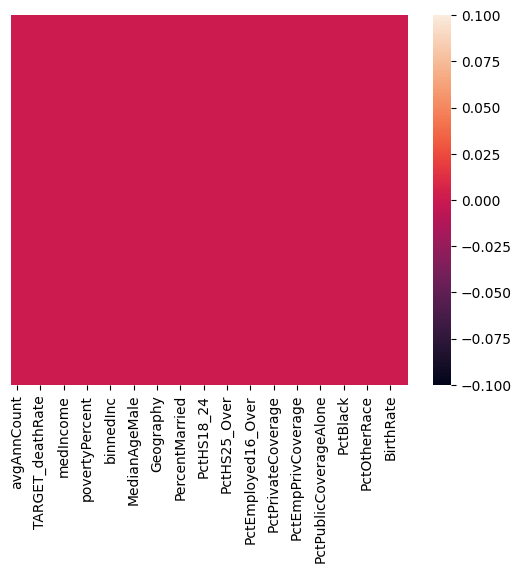

In [16]:
# Generating heatmap is another method to check missing values in the dataset. 
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=True)

In [17]:
# Checking if any missing values in the testing dataset.
df_test.isna().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
Id                         0
dtype: int64

<Axes: >

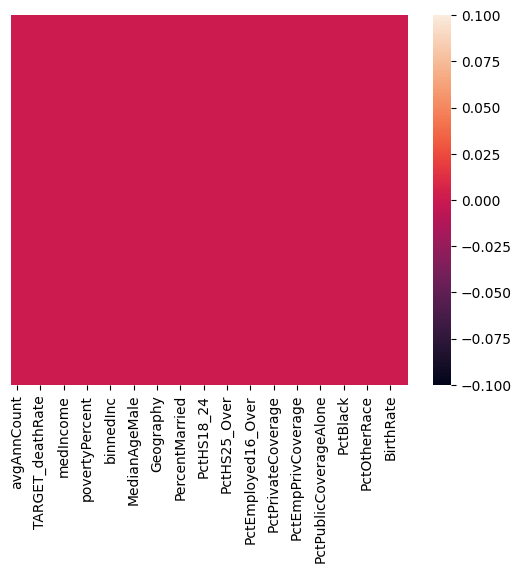

In [18]:
# Generating heatmap to check missing values in the testing dataset. 
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=True)

• Examining if any duplicate values in the datasets.

In [19]:
# Examining if any duplicate values in the training dataset.
df_duplicate_rows = df_train[df_train.duplicated()]
print("The number of duplicate rows in the training dataset:", df_duplicate_rows.shape)

The number of duplicate rows in the training dataset: (0, 34)


In [20]:
# Examining if any duplicate values in the testing dataset.
df_duplicate_rows = df_test[df_test.duplicated()]
print("The number of duplicate rows in the training dataset:", df_duplicate_rows.shape)

The number of duplicate rows in the training dataset: (0, 34)


#### Observation: 

* The heatmap shows that there are no missing values in either dataset after replacing null values with the mean.

#### 3] Analysing Relationship between Target and Independent Feature

Note: Earlier in Part B, the independent features were analyzed in relation to the target variable "TARGET_deathRate," and based on that information, performing testing in this Part C of the assignment 

### • Data Preparation

Note: During the initial data exploration phase, the data is processed and readied for the algorithm use.

#### Feature Engineering

In [21]:
# Removing beginning and tailing brackets '()' and '[]' from the 'binnedInc' feature from training set. 
df_train['binnedInc'] = df_train['binnedInc'].str.strip('[]').astype(str)
df_train['binnedInc'] = df_train['binnedInc'].str.strip('()').astype(str)

# Splitting the two set of information into two new columns 'binnedInc1' and 'binnedInc2' from training set.
df_train[['binnedInc1','binnedInc2']] = df_train['binnedInc'].str.split(',',expand=True)

# Removing beginning and tailing brackets '()' and '[]' from the 'binnedInc' feature from testing set. 
df_test['binnedInc'] = df_test['binnedInc'].str.strip('[]').astype(str)
df_test['binnedInc'] = df_test['binnedInc'].str.strip('()').astype(str)

# Splitting the two set of information into two new columns 'binnedInc1' and 'binnedInc2' from testing set.
df_test[['binnedInc1','binnedInc2']] = df_test['binnedInc'].str.split(',',expand=True)

### **Experiment 1: Building with Lasso Algorithm.**

#### 4] Selecting Target and Independent Features

In [22]:
# Extracting values for multiple independent features and dependent 'TARGET_deathRate' feature for model training.
X = df_train[['incidenceRate', 'povertyPercent', 'PctPublicCoverageAlone', 'PctHS25_Over', 'PctUnemployed16_Over', 'PctPublicCoverage', 'binnedInc1', 'binnedInc2']].values
y = df_train['TARGET_deathRate'].values

# Extracting values for multiple independent features and dependent 'TARGET_deathRate' features for model testing.
X_test = df_test[['incidenceRate', 'povertyPercent', 'PctPublicCoverageAlone', 'PctHS25_Over', 'PctUnemployed16_Over', 'PctPublicCoverage', 'binnedInc1', 'binnedInc2']].values
y_test = df_test['TARGET_deathRate'].values

#### 5] Splitting Data into Training, Validation and Testing Sets

In [23]:
# Create two separate datasets - training and validation, with a ratio of 90 to 10 for the independent feature and target variable.
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size = 0.1, random_state = 19)

#### Observation: 

* By creating a validation set, it gives freedom to conduct several experiments, as multiple experiments can be run on model using this set. On the other hand, the testing set should only be used a few times. Therefore, splitting the training set (ratio of 90:10) into a validation set, to leverage more flexibility for experimentation. 

* Although Multivariate Linear Regression is used for assignment objectives, it is an appropriate choice because the target variable, "TARGET_deathRate," and all the chosen independent variables are continuous and can potentially have infinite values. Therefore, Multivariate Linear Regression is a suitable model choice.

### • Modeling

#### 6] Assessing Baseline Performance

In [24]:
# Creating a 'y_mean' variable with mean/average value of the target variable.
y_mean = y_train.mean()

# Creating array named 'y_base' of same dimension as target variable with above 'y_mean' value.
y_base = np.full(y_train.shape, y_mean)

# Calculating the sum of errors, MSE and MAE between the target variable and its average value. 
echo(f'\nBaseline Performance Score:', underline=True) 
print('Sum of Errors:', (y_base - y_train).sum())
print('MSE:', mse(y_train, y_base, squared=True))
print('MAE:', mae(y_train, y_base))
print('RMSE:', mse(y_train, y_base, squared=False))


Baseline Performance Score:
Sum of Errors: -3.5697667044587433e-11
MSE: 744.5850818154925
MAE: 21.183654351928563
RMSE: 27.287086356287517


#### 7] Training Lasso Model

• Instantiating the Lasso Regression class

In [25]:
# Creating an object named 'lassoreg' from the instantiation of the Lasso Regression class imported from sklearn library.
lassoreg = Lasso()

• Fitting the lasso regression model using a selected multiple independent features.

In [26]:
# Training the lasso regression model with selected multiple independent variables.
lassoreg.fit(X_train, y_train)

Lasso()

• Predicting the values for the target variable using above trained model.

In [27]:
# Predicting the 'TARGET_deathRate' values for multiple independent features employing above trained multivariate regression model
# and storing the result in 'y_train_predict' variable.
y_train_predict = lassoreg.predict(X_train)

In [28]:
# Displaying the line graph of the comparison between the predicted values and actual values of the training set.
perfect_train = alt.Chart(pd.DataFrame({'target': y_train, 'predict': y_train})).mark_line(color='orange').encode(
    x='target',
    y='predict'
)

predicted_train = alt.Chart(pd.DataFrame({'target': y_train, 'predict': y_train_predict})).mark_line().encode(
    x='target',
    y='predict'
  )

predicted_train + perfect_train

alt.LayerChart(...)

• Assessing the performance metrics for the training set.

In [29]:
# Evaluating the Mean Square Error(MSE) and Mean Absolute Error(MAE) performance scores on the training set.
echo(f'\nPerformance Score of the Training Set:', underline=True) 
print('MSE:', mse(y_train, y_train_predict, squared=True))
print('MAE:', mae(y_train, y_train_predict))
print('RMSE:', mse(y_train, y_train_predict, squared=False))


Performance Score of the Training Set:
MSE: 392.52016815894194
MAE: 14.832554609041132
RMSE: 19.812121748034507


#### Observation: 

* The above mentioned MSE, RMSE and MAE performance for the training set exceeds that of the baseline. Proceeding to predicting values on the validation set and evaluating its performance.

• Predicting on validation set utilizing the above trained model.

In [30]:
# Predicting on validation set and storing result in 'y_validate_predict' variable using the trained model. 
y_validate_predict = lassoreg.predict(X_validate)

In [31]:
# Displaying the line graph of the comparison between the predicted values and actual values of the validation set.
perfect_validate = alt.Chart(pd.DataFrame({'target': y_validate, 'predict': y_validate})).mark_line(color='orange').encode(
    x='target',
    y='predict'
)

predicted_validate = alt.Chart(pd.DataFrame({'target': y_validate, 'predict': y_validate_predict})).mark_line().encode(
    x='target',
    y='predict'
  )

predicted_validate + perfect_validate


alt.LayerChart(...)

• Evaluating the performance for the validation set.

In [32]:
# Computing the performance scores for Mean Square Error (MSE) and Mean Absolute Error (MAE) on the validation dataset.
echo(f'\nPerformance Score of the Validation Set:', underline=True) 
print('MSE:', mse(y_validate, y_validate_predict, squared=True))
print('MAE:', mae(y_validate, y_validate_predict))
print('RMSE:', mse(y_validate, y_validate_predict, squared=False))


Performance Score of the Validation Set:
MSE: 370.66238033060876
MAE: 14.663188473107882
RMSE: 19.25259411951046


#### Observation: 

* There is a slight difference between the MSE, RMSE and MAE scores of the training and validation sets.

### • Model Evaluation

#### 8] Analysing Model Performance

• Assessing the performance of the model using the testing set.

In [33]:
# Predicting with testing set and storing result in y_test_predict using the testing set. 
y_test_predict = lassoreg.predict(X_test)

In [34]:
# Displaying the line graph of the comparison between the predicted values and actual values of the testing set.
perfect_test = alt.Chart(pd.DataFrame({'target': y_test, 'predict': y_test})).mark_line(color='orange').encode(
    x='target',
    y='predict'
)

predicted_test = alt.Chart(pd.DataFrame({'target': y_test, 'predict': y_test_predict})).mark_line().encode(
    x='target',
    y='predict'
  )

predicted_test + perfect_test

alt.LayerChart(...)

• Assessing the performance metircs for the testing set.

In [35]:
# Calculating the Mean Square Error (MSE) and Mean Absolute Error (MAE) performance metrics for the testing dataset.
echo(f'\nPerformance Score of the Testing Set:', underline=True) 
print('MSE:', mse(y_test, y_test_predict, squared=True))
print('MAE:', mae(y_test, y_test_predict))
print('RMSE:', mse(y_test, y_test_predict, squared=False))


Performance Score of the Testing Set:
MSE: 442.1526154010836
MAE: 15.582072753837735
RMSE: 21.027425315551202


In [36]:
# Creating a dataframe to hold all the performance scores to review and compare it together.
# Evaluating lasso score for 3 sets and storing it in respective variables. 
lasso_score_train = lassoreg.score(X_train, y_train)
lasso_score_validate = lassoreg.score(X_validate, y_validate)
lasso_score_test = lassoreg.score(X_test, y_test)

# Evaluating lasso performance metrics for training set and storing it in respective variables.
mse_train_lasso = mse(y_train_predict, y_train)          
mae_train_lasso = mae(y_train_predict, y_train)         
rmse_train_lasso = np.sqrt(mse(y_train_predict, y_train))

# Evaluating lasso performance metrics for validation set and storing it in respective variables.
mse_validate_lasso = mse(y_validate_predict, y_validate)          
mae_validate_lasso = mae(y_validate_predict, y_validate)         
rmse_validate_lasso = np.sqrt(mse(y_validate_predict, y_validate))

# Evaluating lasso performance metrics for testing set and storing it in respective variables.
mse_test_lasso=mse(y_test_predict, y_test)          
mae_test_lasso=mae(y_test_predict, y_test)         
rmse_test_lasso=np.sqrt(mse(y_test_predict, y_test))

# Bulding dataframe for lasso performace metrics for 3 sets.
df_lasso_perf = pd.DataFrame({"DataSet": 'Training', "Mean Square Error": mse_train_lasso, "Mean Abs Error": mae_train_lasso, "Root Mean Squared": rmse_train_lasso},index=['DataSet'])
validation = {"DataSet": 'Validation' , "Mean Square Error": mse_validate_lasso, "Mean Abs Error": mae_validate_lasso, "Root Mean Squared": rmse_validate_lasso}
df_lasso_perf = df_lasso_perf.append(validation, ignore_index=True)
testing = {"DataSet": 'Testing' ,"Mean Square Error": mse_test_lasso,"Mean Abs Error": mae_test_lasso,"Root Mean Squared": rmse_test_lasso}
df_lasso_perf = df_lasso_perf.append(testing, ignore_index=True)

# Bulding dataframe for lasso scores for 3 sets.
df_lasso_score = pd.DataFrame({"DataSet": 'Training', "Lasso Score": lasso_score_train},index=['DataSet'])
validation = {"DataSet": 'Validation', "Lasso Score": lasso_score_validate}
df_lasso_score = df_lasso_score.append(validation, ignore_index=True)
testing = {"DataSet": 'Testing', "Lasso Score": lasso_score_test}
df_lasso_score = df_lasso_score.append(testing, ignore_index=True)

In [37]:
# displaying the lasso model's performance metrics for 3 sets.
df_lasso_perf

,DataSet,Mean Square Error,Mean Abs Error,Root Mean Squared
0,Training,392.520168,14.832555,19.812122
1,Validation,370.662380,14.663188,19.252594
2,Testing,442.152615,15.582073,21.027425


In [38]:
# displaying the lasso model's score for 3 sets.
df_lasso_score

,DataSet,Lasso Score
0,Training,0.472834
1,Validation,0.577522
2,Testing,0.458548


### **Experiment 2: Building with Ridge Algorithm.**

#### 4] Selecting Target and Independent Features

In [39]:
# Extracting values for multiple independent features and dependent 'TARGET_deathRate' feature for model training.
X = df_train[['incidenceRate', 'povertyPercent', 'PctPublicCoverageAlone', 'PctHS25_Over', 'PctUnemployed16_Over', 'PctPublicCoverage']].values
y = df_train['TARGET_deathRate'].values

# Extracting values for multiple independent features and dependent 'TARGET_deathRate' features for model testing.
X_test = df_test[['incidenceRate', 'povertyPercent', 'PctPublicCoverageAlone', 'PctHS25_Over', 'PctUnemployed16_Over', 'PctPublicCoverage']].values
y_test = df_test['TARGET_deathRate'].values

#### 5] Splitting Data into Training, Validation and Testing Sets

In [40]:
# Create two separate datasets - training and validation, with a ratio of 90 to 10 for the independent feature and target variable.
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size = 0.1, random_state = 21)

#### 6] Assessing Baseline Performance

Note: Baseline pereformce is calculated in the earlier experiment 1. 

#### 7] Training Ridge Model

• Instantiating the Ridge Regression class

In [41]:
# Creating an object named 'regmodel' from the instantiation of the Ridge Regression class imported from sklearn library.
ridgemodel = Ridge() 

• Fitting the ridge regression model using all the continuous independent features.

In [42]:
# Training the ridge regression model with all the continuous independent variables.
ridgemodel.fit(X_train, y_train)

Ridge()

• Predicting the values for the target variable using above trained model.

In [43]:
# Predicting the 'TARGET_deathRate' values for all the independent features employing above trained multivariate regression model
# and storing the result in 'y_train_predict' variable.
y_train_predict = ridgemodel.predict(X_train)

In [44]:
# Displaying the line graph of the comparison between the predicted values and actual values of the training set.
perfect_train = alt.Chart(pd.DataFrame({'target': y_train, 'predict': y_train})).mark_line(color='green').encode(
    x='target',
    y='predict'
)

predicted_train = alt.Chart(pd.DataFrame({'target': y_train, 'predict': y_train_predict})).mark_line().encode(
    x='target',
    y='predict'
  )

predicted_train + perfect_train

alt.LayerChart(...)

• Assessing the performance metrics for the training set.

In [45]:
# Evaluating the Mean Square Error(MSE) and Mean Absolute Error(MAE) performance scores on the training set.
echo(f'\nPerformance Score of the Training Set:', underline=True) 
print('Sum of Errors:', (y_train_predict - y_train).sum())
print('MSE:', mse(y_train, y_train_predict, squared=True))
print('MAE:', mae(y_train, y_train_predict))
print('RMSE:', mse(y_train, y_train_predict, squared=False))


Performance Score of the Training Set:
Sum of Errors: 4.6497916628140956e-11
MSE: 379.6038590369082
MAE: 14.746588650423536
RMSE: 19.483425238825646


#### Observation: 

* The MSE, RMSE and MAE results for the training set mentioned earlier are better than the baseline. Next, predicting on the validation set and assessing its performance.

• Predicting on validation set utilizing the above trained model.

In [46]:
# Predicting on validation set and storing result in 'y_validate_predict' variable using the trained model. 
y_validate_predict = ridgemodel.predict(X_validate)

In [47]:
# Displaying the line graph of the comparison between the predicted values and actual values of the validation set.
perfect_validate = alt.Chart(pd.DataFrame({'target': y_validate, 'predict': y_validate})).mark_line(color='orange').encode(
    x='target',
    y='predict'
)

predicted_validate = alt.Chart(pd.DataFrame({'target': y_validate, 'predict': y_validate_predict})).mark_line().encode(
    x='target',
    y='predict'
  )

predicted_validate + perfect_validate

alt.LayerChart(...)

• Evaluating the performance metrics for the validation set.

In [48]:
# Computing the performance scores for Mean Square Error (MSE) and Mean Absolute Error (MAE) on the validation dataset.
echo(f'\nPerformance Score of the Validation Set:', underline=True) 
print('MSE:', mse(y_validate, y_validate_predict, squared=True))
print('MAE:', mae(y_validate, y_validate_predict))
print('RMSE:', mse(y_validate, y_validate_predict, squared=False))


Performance Score of the Validation Set:
MSE: 527.4130311533379
MAE: 15.768654258352356
RMSE: 22.965474764379202


#### 8] Analysing Model Performance

• Assessing the performance of the model using the testing set.

In [49]:
# Predicting with testing set and storing result in y_test_predict using the testing set. 
y_test_predict = ridgemodel.predict(X_test)

In [50]:
# Displaying the line graph of the comparison between the predicted values and actual values of the testing set.
perfect_test = alt.Chart(pd.DataFrame({'target': y_test, 'predict': y_test})).mark_line(color='orange').encode(
    x='target',
    y='predict'
)

predicted_test = alt.Chart(pd.DataFrame({'target': y_test, 'predict': y_test_predict})).mark_line().encode(
    x='target',
    y='predict'
  )

predicted_test + perfect_test

alt.LayerChart(...)

In [51]:
# Calculating the Mean Square Error (MSE) and Mean Absolute Error (MAE) performance metrics for the testing dataset.
echo(f'\nPerformance Score of the Testing Set:', underline=True) 
print('MSE:', mse(y_test, y_test_predict, squared=True))
print('MAE:', mae(y_test, y_test_predict))
print('RMSE:', mse(y_test, y_test_predict, squared=False))


Performance Score of the Testing Set:
MSE: 454.3412590081846
MAE: 15.772174086072955
RMSE: 21.315282287790247


In [52]:
# Creating a dataframe to hold all the performance scores to review and compare it together.
# Evaluating ridge score for 3 sets and storing it in respective variables. 
ridge_score_train = ridgemodel.score(X_train, y_train)
ridge_score_validate = ridgemodel.score(X_validate, y_validate)
ridge_score_test = ridgemodel.score(X_test, y_test)

# Evaluating ridge performance metrics for training set and storing it in respective variables.
mse_train_ridge = mse(y_train_predict, y_train)          
mae_train_ridge = mae(y_train_predict, y_train)         
rmse_train_ridge = np.sqrt(mse(y_train_predict, y_train))

# Evaluating ridge performance metrics for validation set and storing it in respective variables.
mse_validate_ridge = mse(y_validate_predict, y_validate)          
mae_validate_ridge = mae(y_validate_predict, y_validate)         
rmse_validate_ridge = np.sqrt(mse(y_validate_predict, y_validate))

# Evaluating ridge performance metrics for testing set and storing it in respective variables.
mse_test_ridge=mse(y_test_predict, y_test)          
mae_test_ridge=mae(y_test_predict, y_test)         
rmse_test_ridge=np.sqrt(mse(y_test_predict, y_test))

# Bulding dataframe for ridge performace metrics for 3 sets.
df_ridge_perf = pd.DataFrame({"DataSet": 'Training', "Mean Square Error": mse_train_ridge, "Mean Abs Error": mae_train_ridge, "Root Mean Squared": rmse_train_ridge},index=['DataSet'])
validation = {"DataSet": 'Validation' , "Mean Square Error": mse_validate_ridge, "Mean Abs Error": mae_validate_ridge, "Root Mean Squared": rmse_validate_ridge}
df_ridge_perf = df_ridge_perf.append(validation, ignore_index=True)
testing = {"DataSet": 'Testing' ,"Mean Square Error": mse_test_ridge,"Mean Abs Error": mae_test_ridge,"Root Mean Squared": rmse_test_ridge}
df_ridge_perf = df_ridge_perf.append(testing, ignore_index=True)

# Bulding dataframe for ridge scores for 3 sets.
df_ridge_score = pd.DataFrame({"DataSet": 'Training', "ridge Score": ridge_score_train},index=['DataSet'])
validation = {"DataSet": 'Validation', "ridge Score": ridge_score_validate}
df_ridge_score = df_ridge_score.append(validation, ignore_index=True)
testing = {"DataSet": 'Testing', "ridge Score": ridge_score_test}
df_ridge_score = df_ridge_score.append(testing, ignore_index=True)


In [53]:
# displaying the rigde model's performance metrics for 3 sets.
df_ridge_perf

,DataSet,Mean Square Error,Mean Abs Error,Root Mean Squared
0,Training,379.603859,14.746589,19.483425
1,Validation,527.413031,15.768654,22.965475
2,Testing,454.341259,15.772174,21.315282


In [54]:
# displaying the rigde model's score for 3 sets.
df_ridge_score

,DataSet,ridge Score
0,Training,0.500941
1,Validation,0.279622
2,Testing,0.443622


### **Experiment 3: Building with Elastinet Algorithm.**

#### 4] Selecting Target and Independent Features

In [55]:
# Extracting values for multiple independent features and dependent 'TARGET_deathRate' feature for model training.
X = df_train[['incidenceRate', 'povertyPercent', 'PctPublicCoverageAlone', 'PctHS25_Over', 'PctUnemployed16_Over', 'PctPublicCoverage']].values
y = df_train['TARGET_deathRate'].values

# Extracting values for multiple independent features and dependent 'TARGET_deathRate' features for model testing.
X_test = df_test[['incidenceRate', 'povertyPercent', 'PctPublicCoverageAlone', 'PctHS25_Over', 'PctUnemployed16_Over', 'PctPublicCoverage']].values
y_test = df_test['TARGET_deathRate'].values

#### 5] Splitting Data into Training, Validation and Testing Sets

In [56]:
# Create two separate datasets - training and validation, with a ratio of 90 to 10 for the independent feature and target variable.
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size = 0.1, random_state = 19)

#### 6] Assessing Baseline Performance

Note: Baseline pereformce is calculated in the earlier experiment 1. 

#### 7] Training Elastinet Model

• Instantiating the Elastinet Regression class

In [57]:
# Creating an object named 'regmodel' from the instantiation of the Elastinet Regression class imported from sklearn library.
elasticnet = ElasticNet()

• Fitting the elastinet regression model using a selected multiple independent features.

In [58]:
# Training the elastinet regression model with all the continuous independent variables.
elasticnet.fit(X_train, y_train)

ElasticNet()

• Predicting the values for the target variable using above trained model.

In [59]:
# Predicting the 'TARGET_deathRate' values for all the independent features employing above trained multivariate regression model
# and storing the result in 'y_train_predict' variable.
y_train_predict = elasticnet.predict(X_train)

In [60]:
# Displaying the line graph of the comparison between the predicted values and actual values of the training set.
perfect_train = alt.Chart(pd.DataFrame({'target': y_train, 'predict': y_train})).mark_line(color='orange').encode(
    x='target',
    y='predict'
)

predicted_train = alt.Chart(pd.DataFrame({'target': y_train, 'predict': y_train_predict})).mark_line().encode(
    x='target',
    y='predict'
  )

predicted_train + perfect_train

alt.LayerChart(...)

• Assessing the performance metrics for the training set.

In [61]:
# Evaluating the Mean Square Error(MSE) and Mean Absolute Error(MAE) performance scores on the training set.
echo(f'\nPerformance Score of the Training Set:', underline=True) 
print('Sum of Errors:', (y_train_predict - y_train).sum())
print('MSE:', mse(y_train, y_train_predict, squared=True))
print('MAE:', mae(y_train, y_train_predict))
print('RMSE:', mse(y_train, y_train_predict, squared=False))


Performance Score of the Training Set:
Sum of Errors: -2.1373125491663814e-11
MSE: 397.3593698130868
MAE: 14.891666130453359
RMSE: 19.933874932212422


#### Observation: 

* The MSE, RMSE and MAE results for the training set mentioned earlier are better than the baseline. Next, predicting on the validation set and assessing its performance.

• Predicting on validation set utilizing the above trained model.

In [62]:
# Predicting on validation set and storing result in 'y_validate_predict' variable using the trained model. 
y_validate_predict = elasticnet.predict(X_validate)

In [63]:
# Displaying the line graph of the comparison between the predicted values and actual values of the validation set.
perfect_validate = alt.Chart(pd.DataFrame({'target': y_validate, 'predict': y_validate})).mark_line(color='orange').encode(
    x='target',
    y='predict'
)

predicted_validate = alt.Chart(pd.DataFrame({'target': y_validate, 'predict': y_validate_predict})).mark_line().encode(
    x='target',
    y='predict'
  )

predicted_validate + perfect_validate

alt.LayerChart(...)

• Evaluating the performance metrics for the validation set.

In [64]:
# Computing the performance scores for Mean Square Error (MSE) and Mean Absolute Error (MAE) on the validation dataset.
echo(f'\nPerformance Score of the Validation Set:', underline=True) 
print('MSE:', mse(y_validate, y_validate_predict, squared=True))
print('MAE:', mae(y_validate, y_validate_predict))
print('RMSE:', mse(y_validate, y_validate_predict, squared=False))


Performance Score of the Validation Set:
MSE: 370.77958457364764
MAE: 14.737632885100831
RMSE: 19.25563773479465


### • Model Evaluation

#### 8] Analysing Model Performance

• Assessing the performance of the model using the testing set.


In [65]:
# Predicting with testing set and storing result in y_test_predict using the testing set. 
y_test_predict = elasticnet.predict(X_test)

In [66]:
# Displaying the line graph of the comparison between the predicted values and actual values of the testing set.
perfect_test = alt.Chart(pd.DataFrame({'target': y_test, 'predict': y_test})).mark_line(color='orange').encode(
    x='target',
    y='predict'
)

predicted_test = alt.Chart(pd.DataFrame({'target': y_test, 'predict': y_test_predict})).mark_line().encode(
    x='target',
    y='predict'
  )

predicted_test + perfect_test

alt.LayerChart(...)

• Assessing the performance metrics for the testing set.

In [67]:
# Calculating the Mean Square Error (MSE) and Mean Absolute Error (MAE) performance metrics for the testing dataset.
echo(f'\nPerformance Score of the Testing Set:', underline=True) 
print('MSE:', mse(y_test, y_test_predict, squared=True))
print('MAE:', mae(y_test, y_test_predict))
print('RMSE:', mse(y_test, y_test_predict, squared=False))


Performance Score of the Testing Set:
MSE: 452.72416920245905
MAE: 15.781191534536323
RMSE: 21.277315836412708


In [68]:
# Creating a dataframe to hold all the performance scores to review and compare it together.
# Evaluating elasticnet score for 3 sets and storing it in respective variables. 
elasticnet_score_train = elasticnet.score(X_train, y_train)
elasticnet_score_validate = elasticnet.score(X_validate, y_validate)
elasticnet_score_test = elasticnet.score(X_test, y_test)

# Evaluating elasticnet performance metrics for training set and storing it in respective variables.
mse_train_elasticnet = mse(y_train_predict, y_train)          
mae_train_elasticnet = mae(y_train_predict, y_train)         
rmse_train_elasticnet = np.sqrt(mse(y_train_predict, y_train))

# Evaluating elasticnet performance metrics for validation set and storing it in respective variables.
mse_validate_elasticnet = mse(y_validate_predict, y_validate)          
mae_validate_elasticnet = mae(y_validate_predict, y_validate)         
rmse_validate_elasticnet = np.sqrt(mse(y_validate_predict, y_validate))

# Evaluating elasticnet performance metrics for testing set and storing it in respective variables.
mse_test_elasticnet=mse(y_test_predict, y_test)          
mae_test_elasticnet=mae(y_test_predict, y_test)         
rmse_test_elasticnet=np.sqrt(mse(y_test_predict, y_test))

# Bulding dataframe for elasticnet performace metrics for 3 sets.
df_elasticnet_perf = pd.DataFrame({"DataSet": 'Training', "Mean Square Error": mse_train_elasticnet, "Mean Abs Error": mae_train_elasticnet, "Root Mean Squared": rmse_train_elasticnet},index=['DataSet'])
validation = {"DataSet": 'Validation' , "Mean Square Error": mse_validate_elasticnet, "Mean Abs Error": mae_validate_elasticnet, "Root Mean Squared": rmse_validate_elasticnet}
df_elasticnet_perf = df_elasticnet_perf.append(validation, ignore_index=True)
testing = {"DataSet": 'Testing' ,"Mean Square Error": mse_test_elasticnet,"Mean Abs Error": mae_test_elasticnet,"Root Mean Squared": rmse_test_elasticnet}
df_elasticnet_perf = df_elasticnet_perf.append(testing, ignore_index=True)

# Bulding dataframe for elasticnet scores for 3 sets.
df_elasticnet_score = pd.DataFrame({"DataSet": 'Training', "elasticnet Score": elasticnet_score_train},index=['DataSet'])
validation = {"DataSet": 'Validation', "elasticnet Score": elasticnet_score_validate}
df_elasticnet_score = df_elasticnet_score.append(validation, ignore_index=True)
testing = {"DataSet": 'Testing', "elasticnet Score": elasticnet_score_test}
df_elasticnet_score = df_elasticnet_score.append(testing, ignore_index=True)

In [69]:
# displaying the elasticnet model's performance metrics for 3 sets.
df_elasticnet_perf

,DataSet,Mean Square Error,Mean Abs Error,Root Mean Squared
0,Training,397.359370,14.891666,19.933875
1,Validation,370.779585,14.737633,19.255638
2,Testing,452.724169,15.781192,21.277316


In [70]:
# displaying the elasticnet model's score for 3 sets.
df_elasticnet_score

,DataSet,elasticnet Score
0,Training,0.466335
1,Validation,0.577389
2,Testing,0.445602


### **Experiment 4: Building with KNN Model with 50 neighbors and Euclidean**

In [71]:
# Extracting values for multiple independent features and dependent 'TARGET_deathRate' feature for model training.
X = df_train[['incidenceRate', 'povertyPercent', 'PctPublicCoverageAlone', 'PctHS25_Over', 'PctUnemployed16_Over', 'PctPublicCoverage']].values
y = df_train['TARGET_deathRate'].values

# Extracting values for multiple independent features and dependent 'TARGET_deathRate' features for model testing.
X_test = df_test[['incidenceRate', 'povertyPercent', 'PctPublicCoverageAlone', 'PctHS25_Over', 'PctUnemployed16_Over', 'PctPublicCoverage']].values
y_test = df_test['TARGET_deathRate'].values

In [72]:
# Create two separate datasets - training and validation, with a ratio of 90 to 10 for the independent feature and target variable.
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size = 0.1, random_state = 19)

• Instantiating the KNN Regression class with 50 neighbors and Euclidean Distance

In [73]:
# Creating an object named 'knneucreg20' from the instantiation of the KNN Regression class with 50 neighbors and Euclidean Distance imported from sklearn library.
knneucreg50 = KNeighborsRegressor(n_neighbors=50, metric='euclidean')

In [74]:
# Training the KNN regression model with euclidean for all the continuous independent variables.
knneucreg50.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=50)

In [75]:
# Predicting the 'TARGET_deathRate' values for all the independent features employing above trained multivariate regression model
# and storing the result in 'y_train_predict' variable.
y_train_predict = knneucreg50.predict(X_train)

In [76]:
# Displaying the line graph of the comparison between the predicted values and actual values of the training set.
perfect_train = alt.Chart(pd.DataFrame({'target': y_train, 'predict': y_train})).mark_line(color='orange').encode(
    x='target',
    y='predict'
)

predicted_train = alt.Chart(pd.DataFrame({'target': y_train, 'predict': y_train_predict})).mark_line().encode(
    x='target',
    y='predict'
  )

predicted_train + perfect_train

alt.LayerChart(...)

In [77]:
# Evaluating the Mean Square Error(MSE) and Mean Absolute Error(MAE) performance scores on the training set.
echo(f'\nPerformance Score of the Training Set:', underline=True) 
print('Sum of Errors:', (y_train_predict - y_train).sum())
print('MSE:', mse(y_train, y_train_predict, squared=True))
print('MAE:', mae(y_train, y_train_predict))
print('RMSE:', mse(y_train, y_train_predict, squared=False))


Performance Score of the Training Set:
Sum of Errors: 752.5099999999994
MSE: 406.66009441567905
MAE: 15.34253327256153
RMSE: 20.165814995077167


In [78]:
# Predicting on validation set and storing result in 'y_validate_predict' variable using the trained model. 
y_validate_predict = knneucreg50.predict(X_validate)


In [79]:
# Displaying the line graph of the comparison between the predicted values and actual values of the validation set.
perfect_validate = alt.Chart(pd.DataFrame({'target': y_validate, 'predict': y_validate})).mark_line(color='orange').encode(
    x='target',
    y='predict'
)

predicted_validate = alt.Chart(pd.DataFrame({'target': y_validate, 'predict': y_validate_predict})).mark_line().encode(
    x='target',
    y='predict'
  )

predicted_validate + perfect_validate

alt.LayerChart(...)

In [80]:
# Computing the performance scores for Mean Square Error (MSE) and Mean Absolute Error (MAE) on the validation dataset.
echo(f'\nPerformance Score of the Validation Set:', underline=True) 
print('MSE:', mse(y_validate, y_validate_predict, squared=True))
print('MAE:', mae(y_validate, y_validate_predict))
print('RMSE:', mse(y_validate, y_validate_predict, squared=False))


Performance Score of the Validation Set:
MSE: 430.3801941967213
MAE: 15.682999999999998
RMSE: 20.745606623975142


In [81]:
# Predicting with testing set and storing result in y_test_predict using the testing set. 
y_test_predict = knneucreg50.predict(X_test)

In [82]:
# Displaying the line graph of the comparison between the predicted values and actual values of the testing set.
perfect_test = alt.Chart(pd.DataFrame({'target': y_test, 'predict': y_test})).mark_line(color='orange').encode(
    x='target',
    y='predict'
)

predicted_test = alt.Chart(pd.DataFrame({'target': y_test, 'predict': y_test_predict})).mark_line().encode(
    x='target',
    y='predict'
  )

predicted_test + perfect_test

alt.LayerChart(...)

In [83]:
# Calculating the Mean Square Error (MSE) and Mean Absolute Error (MAE) performance metrics for the testing dataset.
echo(f'\nPerformance Score of the Testing Set:', underline=True) 
print('MSE:', mse(y_test, y_test_predict, squared=True))
print('MAE:', mae(y_test, y_test_predict))
print('RMSE:', mse(y_test, y_test_predict, squared=False))


Performance Score of the Testing Set:
MSE: 508.81225014121515
MAE: 16.657326765188834
RMSE: 22.55686702849523


In [84]:
# Creating a dataframe to hold all the performance scores to review and compare it together.
# Evaluating knneuc50reg score for 3 sets and storing it in respective variables. 
knneuc50reg_score_train = knneucreg50.score(X_train, y_train)
knneuc50reg_score_validate = knneucreg50.score(X_validate, y_validate)
knneuc50reg_score_test = knneucreg50.score(X_test, y_test)

# Evaluating knneuc50reg performance metrics for training set and storing it in respective variables.
mse_train_knneuc50reg = mse(y_train_predict, y_train)          
mae_train_knneuc50reg = mae(y_train_predict, y_train)         
rmse_train_knneuc50reg = np.sqrt(mse(y_train_predict, y_train))

# Evaluating knneuc50reg performance metrics for validation set and storing it in respective variables.
mse_validate_knneuc50reg = mse(y_validate_predict, y_validate)          
mae_validate_knneuc50reg = mae(y_validate_predict, y_validate)         
rmse_validate_knneuc50reg = np.sqrt(mse(y_validate_predict, y_validate))

# Evaluating knneuc50reg performance metrics for testing set and storing it in respective variables.
mse_test_knneuc50reg=mse(y_test_predict, y_test)          
mae_test_knneuc50reg=mae(y_test_predict, y_test)         
rmse_test_knneuc50reg=np.sqrt(mse(y_test_predict, y_test))

# Bulding dataframe for knneuc50reg performace metrics for 3 sets.
df_knneuc50reg_perf = pd.DataFrame({"DataSet": 'Training', "Mean Square Error": mse_train_knneuc50reg, "Mean Abs Error": mae_train_knneuc50reg, "Root Mean Squared": rmse_train_knneuc50reg},index=['DataSet'])
validation = {"DataSet": 'Validation' , "Mean Square Error": mse_validate_knneuc50reg, "Mean Abs Error": mae_validate_knneuc50reg, "Root Mean Squared": rmse_validate_knneuc50reg}
df_knneuc50reg_perf = df_knneuc50reg_perf.append(validation, ignore_index=True)
testing = {"DataSet": 'Testing' ,"Mean Square Error": mse_test_knneuc50reg,"Mean Abs Error": mae_test_knneuc50reg,"Root Mean Squared": rmse_test_knneuc50reg}
df_knneuc50reg_perf = df_knneuc50reg_perf.append(testing, ignore_index=True)

# Bulding dataframe for knneuc50reg scores for 3 sets.
df_knneuc50reg_score = pd.DataFrame({"DataSet": 'Training', "knneuc50reg Score": knneuc50reg_score_train},index=['DataSet'])
validation = {"DataSet": 'Validation', "knneuc50reg Score": knneuc50reg_score_validate}
df_knneuc50reg_score = df_knneuc50reg_score.append(validation, ignore_index=True)
testing = {"DataSet": 'Testing', "knneuc50reg Score": knneuc50reg_score_test}
df_knneuc50reg_score = df_knneuc50reg_score.append(testing, ignore_index=True)

In [85]:
# displaying the rigde model's score for 3 sets.
df_knneuc50reg_score

,DataSet,knneuc50reg Score
0,Training,0.453843
1,Validation,0.509456
2,Testing,0.376917


### Reviewng and comparing performance metrics for all the algorithms. 

In [86]:
echo(f'Lasso model:', underline=True) 
df_lasso_perf

Lasso model:


,DataSet,Mean Square Error,Mean Abs Error,Root Mean Squared
0,Training,392.520168,14.832555,19.812122
1,Validation,370.662380,14.663188,19.252594
2,Testing,442.152615,15.582073,21.027425


In [87]:
echo(f'Ridge model:', underline=True) 
df_ridge_perf

Ridge model:


,DataSet,Mean Square Error,Mean Abs Error,Root Mean Squared
0,Training,379.603859,14.746589,19.483425
1,Validation,527.413031,15.768654,22.965475
2,Testing,454.341259,15.772174,21.315282


In [88]:
echo(f'Elasticnet model:', underline=True) 
df_elasticnet_perf

Elasticnet model:


,DataSet,Mean Square Error,Mean Abs Error,Root Mean Squared
0,Training,397.359370,14.891666,19.933875
1,Validation,370.779585,14.737633,19.255638
2,Testing,452.724169,15.781192,21.277316


In [89]:
echo(f'KNN regression model with 50 neighbors and Euclidean distance:', underline=True) 
df_knneuc50reg_perf

KNN regression model with 50 neighbors and Euclidean distance:


,DataSet,Mean Square Error,Mean Abs Error,Root Mean Squared
0,Training,406.660094,15.342533,20.165815
1,Validation,430.380194,15.683000,20.745607
2,Testing,508.812250,16.657327,22.556867


### • Summary and Deployment 

* The MSE calculates the average of the squared differences between the predicted and actual values. Since the unit of values is doubled, the error is emphasised. Therefore, to mitigate this effect, the RMSE is used for evaluation below, which cancels out the squaring effect and brings the unit of measurement back to its original scale.

* The difference between the RMSE scores in comparision with multivariate linear regression from part B informs that experiment 1 (from this Part C of assignment) which used Lasso algorithm and experiment 3 that used ElasticNet has improved slightly, while the other two experiments using Ridge and KNN with 50 neighbors and Euclidean Distance have only shown a negligible impact.

    • Note: Part B Experiment 1: MSE scores of the training (19.9257), validation (19.1740), and testing (21.3047).

* Moreover, to gauge the level of overfitting in the model and enhance its ability to generalize, it is significant to further consult with business and understand the outliers and observation's background and reliability with specific informaiton and also that are far from line from the graphs above.

* To get a more comprehensive understanding of the model's performance, additional evaluation metrics and techniques could be employed. 